# Working with Time Series in Pandas

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## How to use dates & times with pandas

### Your first time series

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())



6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## Indexing & resampling time series

### Create a time series of air quality data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


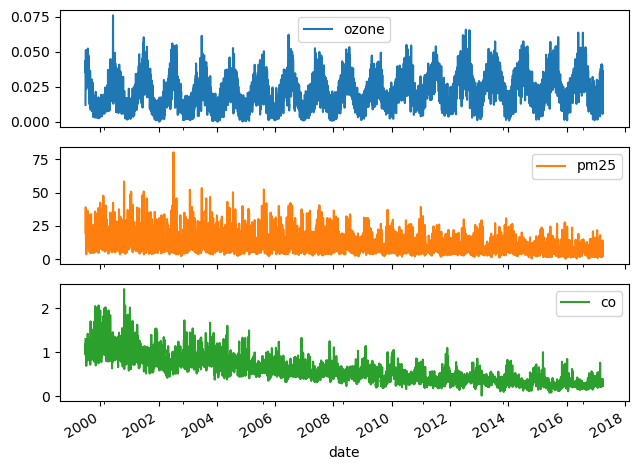

In [4]:
data = pd.read_csv('nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])


# Set date column as index
data.set_index('date', inplace=True)


# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.tight_layout()
plt.show()


### Compare annual stock price trends

In [5]:
yahoo = pd.read_csv('yahoo.csv')

yahoo['date'] = pd.to_datetime(yahoo['date'])

yahoo.set_index('date', inplace=True)

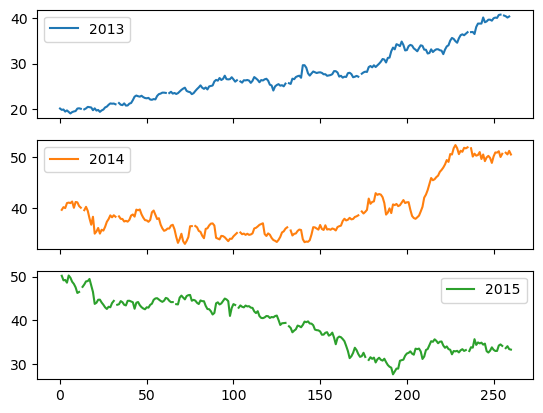

In [6]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(subplots=True)
plt.show()

### Set and change time series frequency

In [7]:
co = pd.read_csv('co_cities.csv')
co['date'] = pd.to_datetime(co['date'])
co.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


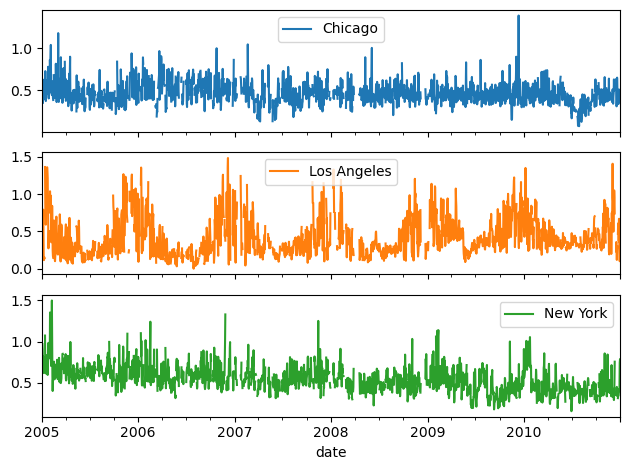

/tmp/ipykernel_843832/2760238250.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  co = co.asfreq('M')


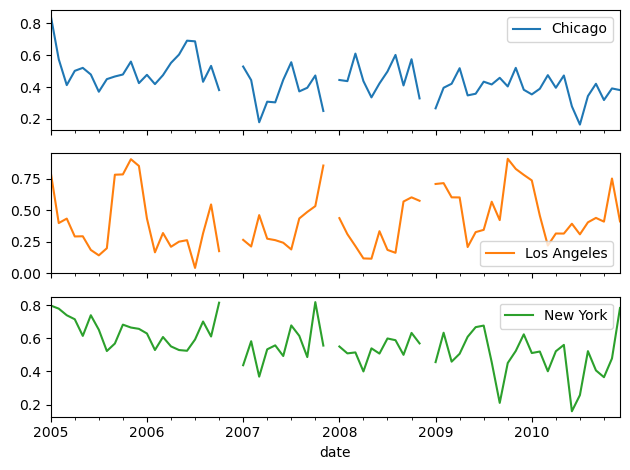

In [8]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.tight_layout()
plt.show()


# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.tight_layout()
plt.show()

## Lags, changes, and returns for stock price series

### Shifting stock prices across time

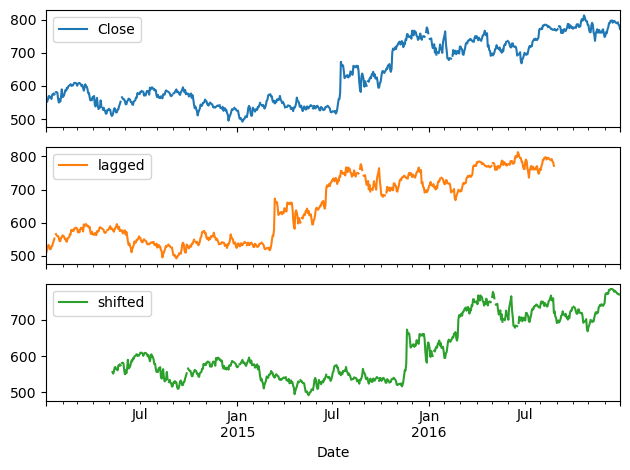

In [9]:
# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google['Close'].shift(periods=-90)
google['shifted'] = google['Close'].shift(periods=90)

# Plot the google price series
google.plot(subplots=True)

plt.tight_layout()

plt.show()

### Calculating stock price changes

In [10]:
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'], index_col='date')
yahoo = yahoo.asfreq('B')

In [11]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo['price'].shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'] - yahoo['shifted_30']

# Get the 30-day price difference
yahoo['diff_30'] = yahoo['price'].diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail(5))

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['change_30'].sub(yahoo['diff_30']).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
Name: count, dtype: int64


### Plotting multi-period returns

In [12]:
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

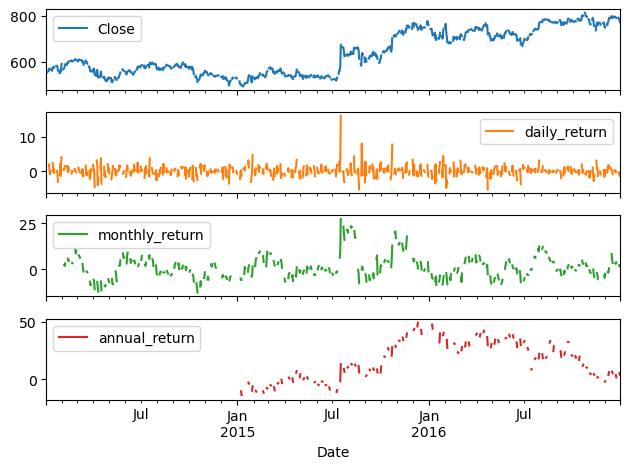

In [13]:
# Create daily_return
google['daily_return'] = google['Close'].pct_change(periods=1, fill_method=None).mul(100)

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(periods=30, fill_method=None).mul(100)

# Create annual_return
google['annual_return'] = google['Close'].pct_change(periods=360, fill_method=None).mul(100)

# Plot the result
google.plot(subplots=True)

plt.tight_layout()

plt.show()
